In [61]:
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from keras.layers import Dense, Flatten, Dropout, BatchNormalization
from keras.callbacks import EarlyStopping
from keras.optimizers import SGD, Adam
from keras.utils import to_categorical
from keras.models import Sequential
from keras.datasets import cifar10
from sklearn import preprocessing
import matplotlib.pyplot as plt
from keras.regularizers import l2
import pandas as pd
import numpy as np
import random
import time

### get cifar dataset

In [2]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

x_train, x_test = x_train.astype("float32") / 255.0, x_test.astype("float32") / 255.0
y_train, y_test = to_categorical(y_train, 10), to_categorical(y_test, 10)

### mlp archi

In [3]:
def define_sequantial_model():
    model = Sequential()
    model.add(Flatten(input_shape=(32, 32, 3)))
    model.add(Dense(128, activation='relu'))
    model.add(Dense(64, activation='relu'))
    model.add(Dense(10, activation='softmax'))
    return model

In [4]:
model = define_sequantial_model()

/home/mina/anaconda3/lib/python3.12/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [6]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 3072)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       393,344 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 402,250 (1.53 MB)

 Trainable params: 402,250 (1.53 MB)

 Non-trainable params: 0 (0.00 B)

In [5]:
def training_sequantial_model(model, size):
    history = model.fit(x_train, y_train, epochs=50, batch_size=size, validation_data=(x_val, y_val))
    return history

In [6]:
def plot_learning_curves(history, title):
    plt.figure(figsize=(12, 5))

    plt.subplot(1, 2, 1)
    plt.plot(history.history['loss'], label='training loss')
    plt.plot(history.history['val_loss'], label='validation loss')
    plt.title(f'{title} - loss')
    plt.xlabel('epoch')
    plt.ylabel('loss')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(history.history['accuracy'], label='training accuracy')
    plt.plot(history.history['val_accuracy'], label='validation accuracy')
    plt.title(f'{title} - accuracy')
    plt.xlabel('epoch')
    plt.ylabel('accuracy')
    plt.legend()

    plt.show()

### train and validation set (20%)

In [7]:
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=42)

In [8]:
x_train.shape

(40000, 32, 32, 3)

In [9]:
y_train.shape

(40000, 10)

In [10]:
x_val.shape

(10000, 32, 32, 3)

In [11]:
x_test.shape

(10000, 32, 32, 3)

### mini-batch SGD (batch_size = 128, learning_rate = 0.01, epochs = 50)

In [12]:
mini_sgd_model = define_sequantial_model()

mini_sgd_time_start = time.time()
mini_sgd_model.compile(optimizer=SGD(learning_rate=0.01), loss='categorical_crossentropy', metrics=['accuracy'])
mini_sgd_history = training_sequantial_model(mini_sgd_model, 128)
mini_sgd_time_end = time.time()

mini_sgd_time = mini_sgd_time_end - mini_sgd_time_start

Epoch 1/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - accuracy: 0.2168 - loss: 2.1585 - val_accuracy: 0.2858 - val_loss: 1.9730
Epoch 2/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.3298 - loss: 1.9052 - val_accuracy: 0.3490 - val_loss: 1.8439
Epoch 3/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.3578 - loss: 1.8275 - val_accuracy: 0.3580 - val_loss: 1.8090
Epoch 4/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.3800 - loss: 1.7705 - val_accuracy: 0.3808 - val_loss: 1.7527
Epoch 5/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.3911 - loss: 1.7308 - val_accuracy: 0.3701 - val_loss: 1.7598
Epoch 6/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.4023 - loss: 1.6961 - val_accuracy: 0.3926 - val_loss: 1.7136
Epoch 7/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - accuracy: 0.4139 - loss: 1.6630 - val_accuracy: 0.4108 - val_loss: 1.6671
Epoch 8/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.4224 - loss: 1.6470 - val_accuracy

### learning curves on train/validation set

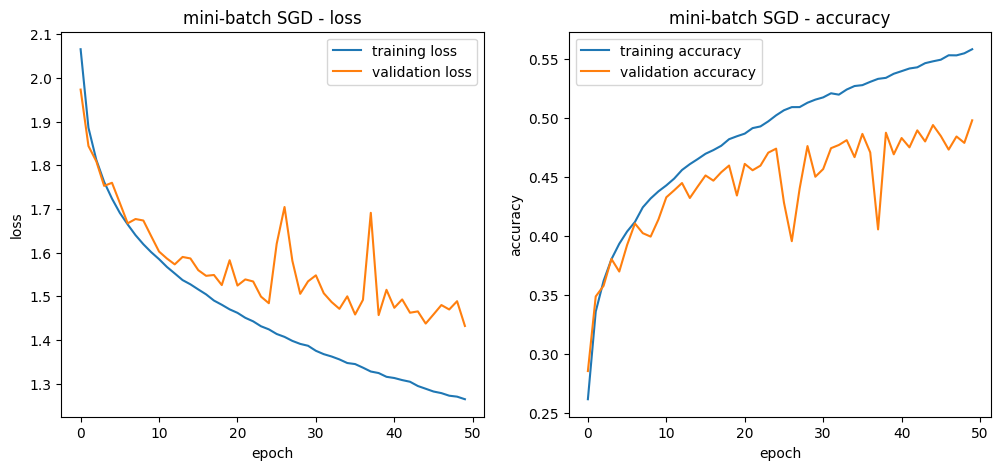

In [13]:
plot_learning_curves(mini_sgd_history, 'mini-batch SGD')

In [14]:
print('mini-batch sgd execution time:', mini_sgd_time)

mini-batch sgd execution time: 150.58031725883484


### L2 norm regularization

In [15]:
def define_l2_sequantial_model():
    model = Sequential()
    model.add(Flatten(input_shape=(32, 32, 3)))
    model.add(Dense(128, activation='relu'))
    model.add(Dense(64, activation='relu', kernel_regularizer=l2(0.01)))
    model.add(Dense(10, activation='softmax'))
    return model

In [16]:
mini_sgd_l2_model = define_l2_sequantial_model()

mini_sgd_l2_time_start = time.time()
mini_sgd_l2_model.compile(optimizer=SGD(learning_rate=0.01), loss='categorical_crossentropy', metrics=['accuracy'])
mini_sgd_l2_history = training_sequantial_model(mini_sgd_l2_model, 128)
mini_sgd_l2_time_end = time.time()

mini_sgd_l2_time = mini_sgd_l2_time_end - mini_sgd_l2_time_start

Epoch 1/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.2124 - loss: 2.9892 - val_accuracy: 0.2800 - val_loss: 2.7440
Epoch 2/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.3197 - loss: 2.6592 - val_accuracy: 0.3181 - val_loss: 2.5648
Epoch 3/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.3497 - loss: 2.5022 - val_accuracy: 0.3589 - val_loss: 2.4180
Epoch 4/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.3700 - loss: 2.3822 - val_accuracy: 0.3552 - val_loss: 2.3337
Epoch 5/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.3782 - loss: 2.2907 - val_accuracy: 0.3609 - val_loss: 2.2651
Epoch 6/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.3853 - loss: 2.2035 - val_accuracy: 0.3871 - val_loss: 2.1558
Epoch 7/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.3934 - loss: 2.1406 - val_accuracy: 0.3869 - val_loss: 2.1050
Epoch 8/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.3998 - loss: 2.0758 - val_accuracy: 0

### learning curves on train/validation set

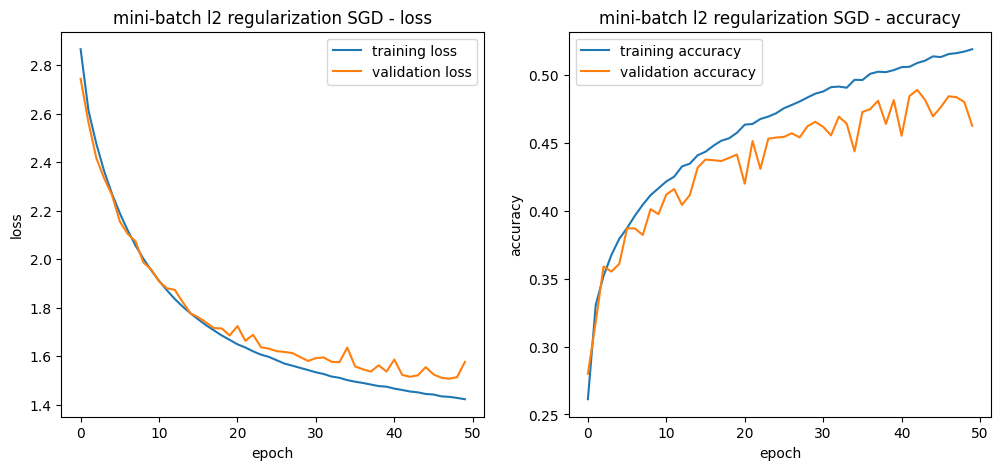

In [17]:
plot_learning_curves(mini_sgd_l2_history, 'mini-batch l2 regularization SGD')

In [18]:
print('mini-batch sgd regularization execution time:', mini_sgd_l2_time)

mini-batch sgd regularization execution time: 149.58884382247925


### comparaison

### dropout layer (rates 0.2, 0.3, 0.5)

In [20]:
def define_dropout_sequantial_model(dropout_rate):
    model = Sequential()
    model.add(Flatten(input_shape=(32, 32, 3))) 
    model.add(Dense(128, activation='relu'))  
    model.add(Dense(64, activation='relu')) 
    model.add(Dropout(dropout_rate)) 
    model.add(Dense(10, activation='softmax')) 
    return model

rate = 0.2

In [21]:
first_dropout_model = define_dropout_sequantial_model(dropout_rate=0.2)

first_dropout_time_start = time.time()
first_dropout_model.compile(optimizer=SGD(learning_rate=0.01), loss='categorical_crossentropy', metrics=['accuracy'])
first_dropout_history = training_sequantial_model(first_dropout_model, 128)
first_dropout_time_end = time.time()

first_dropout_time = first_dropout_time_end - first_dropout_time_start

/home/mina/anaconda3/lib/python3.12/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - accuracy: 0.1906 - loss: 2.1993 - val_accuracy: 0.3023 - val_loss: 1.9840
Epoch 2/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.2866 - loss: 1.9808 - val_accuracy: 0.3323 - val_loss: 1.8992
Epoch 3/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.3288 - loss: 1.8893 - val_accuracy: 0.3576 - val_loss: 1.8112
Epoch 4/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.3497 - loss: 1.8430 - val_accuracy: 0.3704 - val_loss: 1.7820
Epoch 5/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.3623 - loss: 1.7974 - val_accuracy: 0.3813 - val_loss: 1.7616
Epoch 6/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.3720 - loss: 1.7747 - val_accuracy: 0.3911 - val_loss: 1.7221
Epoch 7/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.3815 - loss: 1.7422 - val_accuracy: 0.4042 - val_loss: 1.6855
Epoch 8/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.3881 - loss: 1.7222 - val_accuracy

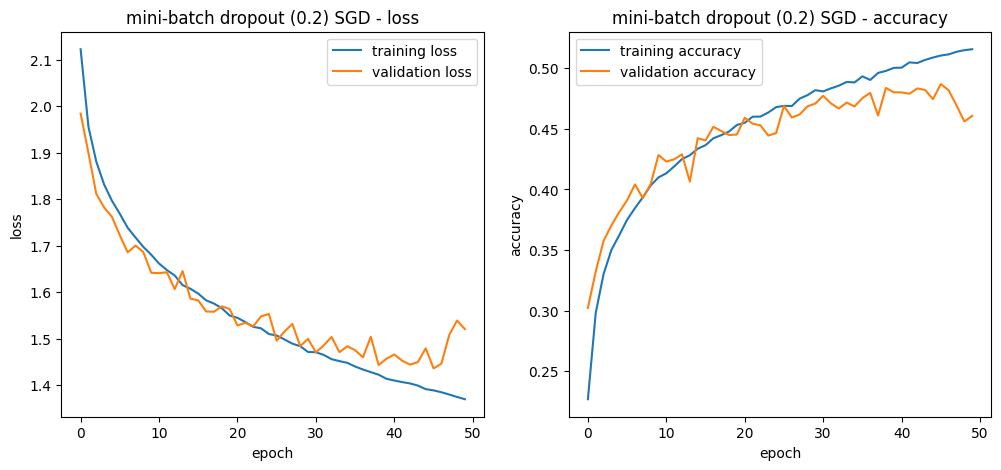

In [22]:
plot_learning_curves(first_dropout_history, 'mini-batch dropout (0.2) SGD')

In [23]:
print('mini-batch dropout (0.2) execution time:', first_dropout_time)

mini-batch dropout (0.2) execution time: 158.8539731502533


rate = 0.3

In [24]:
second_dropout_model = define_dropout_sequantial_model(dropout_rate=0.3)

second_dropout_time_start = time.time()
second_dropout_model.compile(optimizer=SGD(learning_rate=0.01), loss='categorical_crossentropy', metrics=['accuracy'])
second_dropout_history = training_sequantial_model(second_dropout_model, 128)
second_dropout_time_end = time.time()

second_dropout_time = second_dropout_time_end - second_dropout_time_start

Epoch 1/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 14ms/step - accuracy: 0.1913 - loss: 2.1803 - val_accuracy: 0.2941 - val_loss: 1.9612
Epoch 2/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.2854 - loss: 1.9722 - val_accuracy: 0.3440 - val_loss: 1.8754
Epoch 3/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - accuracy: 0.3161 - loss: 1.9110 - val_accuracy: 0.3445 - val_loss: 1.8570
Epoch 4/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - accuracy: 0.3352 - loss: 1.8671 - val_accuracy: 0.3579 - val_loss: 1.8169
Epoch 5/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - accuracy: 0.3446 - loss: 1.8367 - val_accuracy: 0.3683 - val_loss: 1.7738
Epoch 6/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - accuracy: 0.3496 - loss: 1.8105 - val_accuracy: 0.3777 - val_loss: 1.7494
Epoch 7/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.3641 - loss: 1.7869 - val_accuracy: 0.3925 - val_loss: 1.7262
Epoch 8/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.3820 - loss: 1.7574 - val_accu

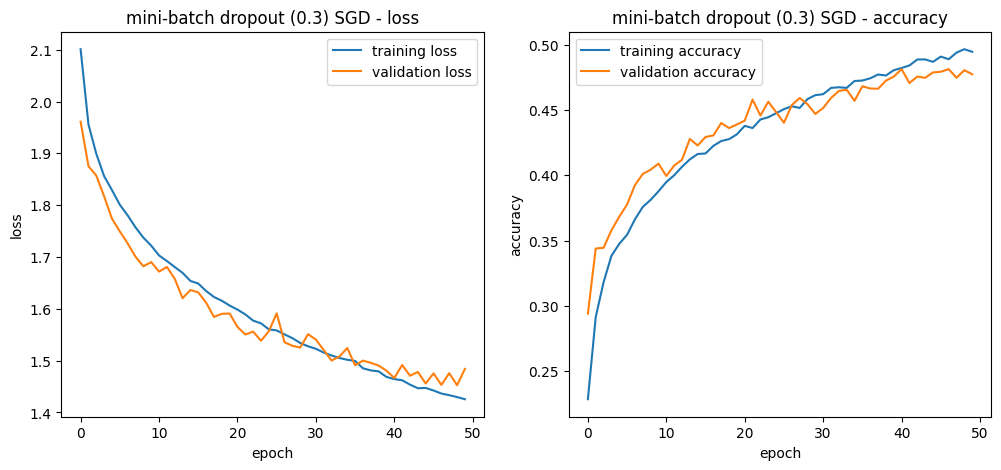

In [25]:
plot_learning_curves(second_dropout_history, 'mini-batch dropout (0.3) SGD')

In [26]:
print('mini-batch dropout (0.3) execution time:', second_dropout_time)

mini-batch dropout (0.3) execution time: 169.56018805503845


rate = 0.5

In [27]:
third_dropout_model = define_dropout_sequantial_model(dropout_rate=0.5)

third_dropout_time_start = time.time()
third_dropout_model.compile(optimizer=SGD(learning_rate=0.01), loss='categorical_crossentropy', metrics=['accuracy'])
third_dropout_history = training_sequantial_model(third_dropout_model, 128)
third_dropout_time_end = time.time()

third_dropout_time = third_dropout_time_end - third_dropout_time_start

Epoch 1/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 6s 16ms/step - accuracy: 0.1594 - loss: 2.2488 - val_accuracy: 0.2956 - val_loss: 2.0421
Epoch 2/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.2444 - loss: 2.0740 - val_accuracy: 0.3148 - val_loss: 1.9363
Epoch 3/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.2756 - loss: 2.0016 - val_accuracy: 0.3226 - val_loss: 1.8964
Epoch 4/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - accuracy: 0.2977 - loss: 1.9434 - val_accuracy: 0.3335 - val_loss: 1.8650
Epoch 5/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.3106 - loss: 1.9161 - val_accuracy: 0.3660 - val_loss: 1.8124
Epoch 6/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.3292 - loss: 1.8740 - val_accuracy: 0.3665 - val_loss: 1.7885
Epoch 7/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step - accuracy: 0.3309 - loss: 1.8624 - val_accuracy: 0.3804 - val_loss: 1.7608
Epoch 8/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.3445 - loss: 1.8338 - val_accurac

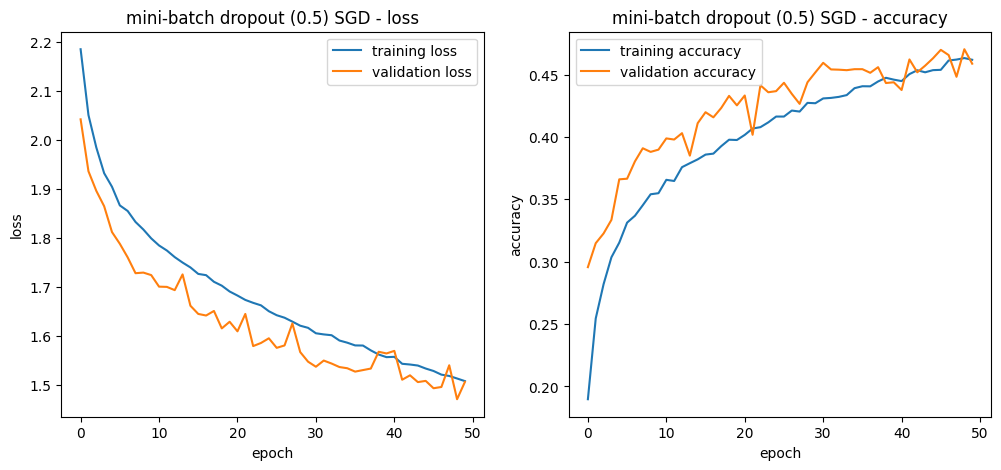

In [28]:
plot_learning_curves(third_dropout_history, 'mini-batch dropout (0.5) SGD')

In [30]:
print('mini-batch dropout (0.5) execution time:', third_dropout_time)

mini-batch dropout (0.5) execution time: 163.00218081474304


### comparaison

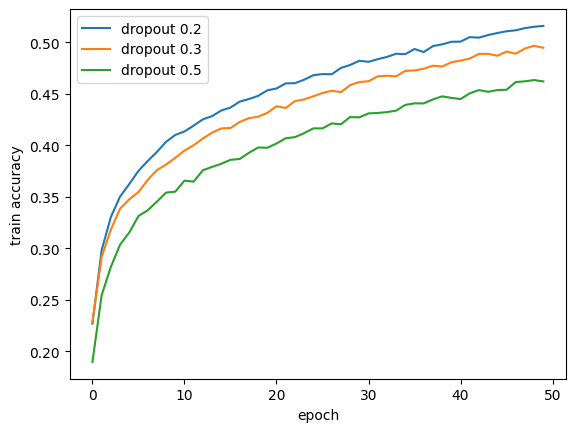

In [31]:
plt.plot(pd.DataFrame(first_dropout_history.history)[['accuracy']], label='dropout 0.2')
plt.plot(pd.DataFrame(second_dropout_history.history)[['accuracy']], label='dropout 0.3')
plt.plot(pd.DataFrame(third_dropout_history.history)[['accuracy']], label='dropout 0.5')

plt.xlabel('epoch')
plt.ylabel('train accuracy')
plt.legend()
plt.show()

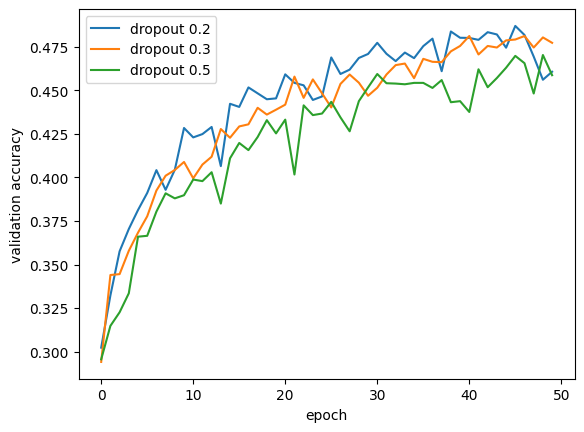

In [32]:
plt.plot(pd.DataFrame(first_dropout_history.history)[['val_accuracy']], label='dropout 0.2')
plt.plot(pd.DataFrame(second_dropout_history.history)[['val_accuracy']], label='dropout 0.3')
plt.plot(pd.DataFrame(third_dropout_history.history)[['val_accuracy']], label='dropout 0.5')

plt.xlabel('epoch')
plt.ylabel('validation accuracy')
plt.legend()
plt.show()

### early stopping technique

In [44]:
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True, verbose=1)

In [45]:
dropout_early_stopping_time_start = time.time()
dropout_early_stopping_history = second_dropout_model.fit(x_train, y_train, epochs=50, batch_size=128, validation_data=(x_val, y_val), callbacks=[early_stopping])
dropout_early_stopping_time_end = time.time()

Epoch 1/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 17ms/step - accuracy: 0.5536 - loss: 1.2521 - val_accuracy: 0.4992 - val_loss: 1.4055
Epoch 2/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step - accuracy: 0.5558 - loss: 1.2477 - val_accuracy: 0.4985 - val_loss: 1.4079
Epoch 3/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step - accuracy: 0.5604 - loss: 1.2429 - val_accuracy: 0.4824 - val_loss: 1.4613
Epoch 4/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step - accuracy: 0.5582 - loss: 1.2401 - val_accuracy: 0.5086 - val_loss: 1.3951
Epoch 5/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - accuracy: 0.5584 - loss: 1.2380 - val_accuracy: 0.5112 - val_loss: 1.3787
Epoch 6/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.5567 - loss: 1.2372 - val_accuracy: 0.4951 - val_loss: 1.4508
Epoch 7/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - accuracy: 0.5658 - loss: 1.2261 - val_accuracy: 0.5055 - val_loss: 1.3944
Epoch 8/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - accuracy: 0.5643 - loss: 1.2279 - val_accu

In [50]:
print(f"training stopped at epoch {len(dropout_early_stopping_history.history['loss'])}")

training stopped at epoch 10


In [51]:
dropout_early_stopping_time = dropout_early_stopping_time_end - dropout_early_stopping_time_start
print(f"execution time: {dropout_early_stopping_time:.2f} seconds")

execution time: 39.17 seconds


### batch normalization layer

In [55]:
batch_normalization_model = Sequential()
batch_normalization_model.add(Flatten(input_shape=(32, 32, 3))) 
batch_normalization_model.add(Dense(128, activation='relu')) 
BatchNormalization()
batch_normalization_model.add(Dense(64, activation='relu')) 
batch_normalization_model.add(Dense(10, activation='softmax'))

/home/mina/anaconda3/lib/python3.12/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [56]:
batch_normalization_time_start = time.time()
batch_normalization_model.compile(optimizer=SGD(learning_rate=0.01), loss='categorical_crossentropy', metrics=['accuracy'])
batch_normalization_history = training_sequantial_model(batch_normalization_model, 128)
batch_normalization_time_end = time.time()

batch_normalization_time = batch_normalization_time_end - batch_normalization_time_start

Epoch 1/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 6s 18ms/step - accuracy: 0.2142 - loss: 2.1508 - val_accuracy: 0.2934 - val_loss: 1.9623
Epoch 2/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 10s 16ms/step - accuracy: 0.3316 - loss: 1.8930 - val_accuracy: 0.3377 - val_loss: 1.8536
Epoch 3/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 14ms/step - accuracy: 0.3628 - loss: 1.8205 - val_accuracy: 0.3521 - val_loss: 1.8028
Epoch 4/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 17ms/step - accuracy: 0.3782 - loss: 1.7715 - val_accuracy: 0.3597 - val_loss: 1.8145
Epoch 5/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step - accuracy: 0.3883 - loss: 1.7419 - val_accuracy: 0.3917 - val_loss: 1.7277
Epoch 6/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 14ms/step - accuracy: 0.3975 - loss: 1.7069 - val_accuracy: 0.3918 - val_loss: 1.7182
Epoch 7/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 6s 19ms/step - accuracy: 0.4124 - loss: 1.6772 - val_accuracy: 0.4087 - val_loss: 1.6725
Epoch 8/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 6s 18ms/step - accuracy: 0.4196 - loss: 1.6531 - val_acc

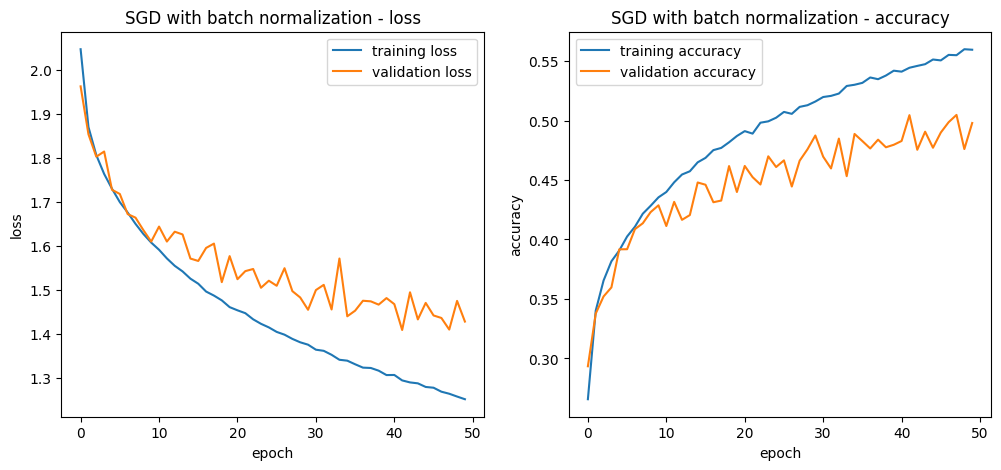

In [64]:
plot_learning_curves(batch_normalization_history, 'SGD with batch normalization')

In [65]:
print('SGD with batch normalization execution time:', batch_normalization_time)

SGD with batch normalization execution time: 233.038245677948


### random search to find best hyperparameter

In [68]:
learning_rates = [0.001, 0.005, 0.01, 0.05, 0.1]
dropout_rates = [0.1, 0.2, 0.3, 0.4, 0.5]
batch_sizes = [16, 32, 64, 128]

best_acc = 0
best_params = {}

In [70]:
def create_random_model(learning_rate, dropout_rate):
    model = Sequential()

    model.add(Flatten(input_shape=(32, 32, 3)))
    model.add(Dense(128, activation='relu'))
    model.add(Dense(64, activation='relu', kernel_regularizer=l2(0.01)))
    Dropout(dropout_rate)
    model.add(Dense(10, activation='softmax'))

    model.compile(optimizer=SGD(learning_rate=learning_rate), loss='categorical_crossentropy', metrics=['accuracy'])

    return model

In [74]:
for trial in range(5):

    __learning_rate = random.choice(learning_rates)
    __dropout_rate = random.choice(dropout_rates)
    __batch_size = random.choice(batch_sizes)
    
    print(f"trial {trial+1}: learning_rate={__learning_rate}, dropout_rate={__dropout_rate}, batch_size={__batch_size} \n")

    random_search_model = create_random_model(__learning_rate, __dropout_rate)

    random_search_model_history = random_search_model.fit(x_train, y_train, epochs=50, batch_size=__batch_size, validation_data=(x_val, y_val))
    
    val_acc = max(random_search_model_history.history['val_accuracy'])

    print(f"best validation accuracy: {val_acc:.4f} \n")

    if val_acc > best_acc:
        best_acc = val_acc
        best_params = {'learning_rate': __learning_rate, 'dropout_rate': __dropout_rate, 'batch_size': __batch_size}

print("best hyper-parameters: ", best_params)


trial 1: learning_rate=0.05, dropout_rate=0.5, batch_size=64 

Epoch 1/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.2413 - loss: 2.7056 - val_accuracy: 0.3584 - val_loss: 2.0569
Epoch 2/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 6s 10ms/step - accuracy: 0.3599 - loss: 1.9859 - val_accuracy: 0.3749 - val_loss: 1.8377
Epoch 3/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 6s 10ms/step - accuracy: 0.3933 - loss: 1.7776 - val_accuracy: 0.4083 - val_loss: 1.7162
Epoch 4/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.4116 - loss: 1.6960 - val_accuracy: 0.4264 - val_loss: 1.6668
Epoch 5/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.4317 - loss: 1.6402 - val_accuracy: 0.4472 - val_loss: 1.6041
Epoch 6/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.4418 - loss: 1.6101 - val_accuracy: 0.4500 - val_loss: 1.6167
Epoch 7/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.4531 - loss: 1.5848 - val_accuracy: 0.4592 - val_loss: 1.5783
Epoch 8/50
625/625 ━━━━━━━━━━━━━━━━━━━━

KeyboardInterrupt: 

In [ ]:
from tensorflow.keras.layers import BatchNormalization

# Define the model with hyperparameters as variables


# Define the search space of hyperparameters
param_dist = {
    'learning_rate': [0.001, 0.01, 0.1, 0.2],
    'dropout_rate': [0.1, 0.2, 0.3, 0.4],
    'batch_size': [32, 64, 128, 256]
}

# Define the random search object
rs = RandomizedSearchCV(
    keras.wrappers.scikit_learn.KerasClassifier(create_model),
    param_distributions=param_dist,
    n_iter=10,
    cv=3,
    verbose=2
)

# Fit the random search object to the data
rs.fit(X_train, y_train, epochs=50, validation_data=(X_val, y_val))

# Print the best hyperparameters and their corresponding scores
print('Best Parameters: ', rs.best_params_)
print('Best Score: ', rs.best_score_)
